---
title: Moral hazard and limited liability
subtitle: Credit without monitoring or intermediation
exports:
  - format: pdf
    template: springer
    output: exports/basicmodel.pdf
abstract: |
  A base model of moral hazard and limited liability with no monitoring nor intermediation.
---

This notebook describes a simple version of a two outcome model of moral hazard and limited liability, without a monitor. It demonstrates how minimum collateral requirements would vary depending on project conditions (probability of success, scope for moral hazard, etc). 

Skip if you are familiar with this basic model.

## No monitoring case

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

**Model Parameters**

In [2]:
X = 200       #Project returns under success (=0 under failure)
p = 0.7       #probability of success if diligent
q = 0.5       #probability of success if non-diligent
I = 100       #project investment 
gamma = 1     #outside lenders' cost of funds
B = 20
F = 0        # Fixed cost of loan
Amax = 120
Amin = p*B/(p-q) -(p*X - gamma*I) + F

In [3]:
print('Expected project return {}'.format(p*X))
print('Expected cost of funds {}'.format(gamma*I+F))
print('LL rent at A=0 is {:5.1f}'.format(p*B/(p-q)))
print('Min collateral requirement is {:5.1f}'.format(Amin))
print('LL rent at A= Amin is {}'.format(-Amin+p*B/(p-q)))

Expected project return 140.0
Expected cost of funds 100
LL rent at A=0 is  70.0
Min collateral requirement is  30.0
LL rent at A= Amin is 40.0


## Minimum collateral requirements
Note that in this simple two outcome world, the project can either end in "failure" (zero output) or "success" (output $X$).  The contract states outcome-contingent payoffs of $(s_f, s_s) = (-A, s)$ to the entrepreneur/borrower, where $A$ represents the pledged (seizable) assets.  The bank therefore receives $(R_f, R_s) = (A, X-s)$.

We will derive the minimum collateral requirement $A$ that the bank will require that a borrower provide. This is the "skin in the game" that the lender will require to diminish the scope for moral hazard via the terms of the contract. 

**Bank Participation constraint**:
$$p(X - s) + (1 - p)A \ge \gamma I + F$$

**Incentive compatibility** constraint when entrepreneur has pledgeable assets $A$:
$$s \ge  - A + \frac{B}{\Delta }$$

The **limited liability** constraint is written:
$$s \ge - A$$

In fact, a limited liability constraint must hold for each outcome state to make sure that the value of promised repayment in that state does not exceed the value of output plus any pledgeable collateral $A$.  In this two-state world, however, the constraints are $(X - s) \le  A$ and $(0 - s) \le  A$, but the latter will always bind first, so we need only focus on this first constraint, as re-written and stated above.

$$
\underbar{A} = \frac{pB}{p-q} - (pX - \gamma I) 
$$

**Diagram plots**
We want to plot the linear constraints and/or objectives lines in $s_f - s_s$ space. For example a zero profit condition:
$$p(X-s_s)+(1-p)(0-s_f) - \gamma I = 0$$

can be rearanged to plot $s_s$ as a function of $s_f$:

$$s_s = X - \frac{\gamma I}{p} -\frac{1-p}{p} s_f$$


Since we'll be illustrating things below with a variety of linear plots, we will economize on code by writing a simple 'function factory' `line_function(a,b)` that will allow us to easily create parameterized line functions.  Another `plot_contraints()` function will plot the linear participation, incentive compatibility, and limited liability constraints to identify the optimum contract and minimum collateral requirement.

In [4]:
def line_function(a, b):
    '''return a line function of the form f(x) = a + b*x'''
    def f(x):
        return a + b*x
    return f

def plot_constraints(*args, cfmin = -100, cfmax = 200): 
    '''Plotting helper.  This plots contract constraints 
    Accepts a variable number of lines/constraint passed as functions
    that are then plotted on the same diagram'''
    cf = np.linspace(cfmin, cfmax, cfmax-cfmin+1)  # plot range
    for count, fn in enumerate(args):              
        plt.plot(cf, fn(cf))
    #plt.axhline(0, linestyle=':', color='black')
    plt.axvline(0, linestyle=':', color='black')
    plt.ylim(-10,300)                   

Contract: (-A, s) = (-30.0, 70.0)


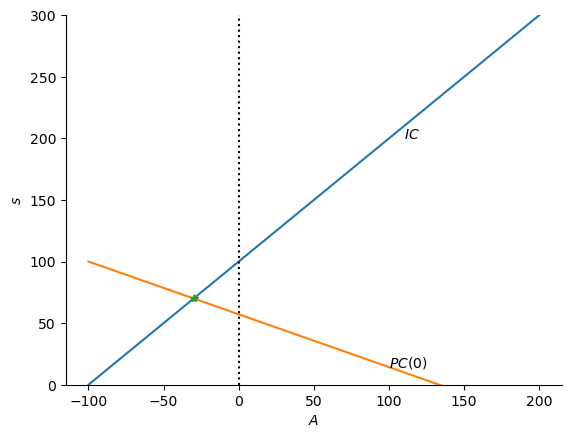

In [5]:
zeroprofit = line_function(X - I/p - F/p, -(1-p)/p)  
ic = line_function(B/(p-q), 1)      # IC
plot_constraints(ic, zeroprofit)
minA = p*B/(p-q) -(p*X - gamma*I)

print(f'Contract: (-A, s) = ({-minA:0.1f}, {zeroprofit(-minA):0.1f})')

plt.plot(-minA, zeroprofit(-minA), marker='*')
plt.ylim(0,300)

plt.ylabel(r'$s$')
plt.xlabel(r'$A$')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.text(100, zeroprofit(100), r'$PC(0)$')
plt.text(110, ic(100), r'$IC$')
plt.show();

A limited liability constraint would appear as a vertical line (e.g. $s_f \lt -A$).
As drawn above the bank's zero-profit participation constraint $PC(0)$ intersects the incentive compatibility constraint $IC$ at the point

$$
s_f = - \underbar A   \\
s_s = - \underbar A + \frac{B}{\Delta}
$$

Any borrower with assets $A$ less than $\underbar A$ would not be able to borrow from the bank.  